# Notebook activity RU.03 Checking the model assumptions for a Poisson GLM with only main effects

In Notebook activity RU.02, we used stepwise regression to select a Poisson GLM for the response `medals` from the Olympic dataset, considering only the main effects as potential explanatory variables. As the preferred model, the `step()` function selected the full model - that is, the Poisson GLM:

`medals ~ lagMedals + population + gdp + logPopulation + logGdp + host + nextHost + year`.

In this notebook activity, we shall assess the fit of this model.

The data for this dataset are stored in the data frame `olympic`. 

## (a) Getting started

### (i)

Start by running the following code. 

In [ ]:
#Load the M348 package
library(M348)
#Load the data frame
data(olympic)
# Check the data frame has loaded OK
head(olympic)

## (b) Fit the model

We wish to check the model assumptions for the model selected by the `step()` function in Notebook activity RU.02. We'll do this next, after creating the new variables:

`logPopulation` = `log(population)` and `logGdp` = `log(gdp)`,

which are both required for our selected model.

### (i)

Use the empty code cell below to:

* Create the new variable `logPopulation` and add it to `olympic`.

* Create the new variable `logGdp` and add it to `olympic`.

* Fit the Poisson GLM:

`medals ~ lagMedals + population + gdp + logPopulation + logGdp + host + nextHost + year`.

Store the output from fitting your model in the object `modelFit`.

#### Solution <a class="tocSkip">

The required code is given in below. Running the code cell will create the new variables and fit the model, but won't give any output.

In [2]:
# create new variable logPopulation
olympic$logPopulation <- log(olympic$population)

# create new variable logGdp
olympic$logGdp <- log(olympic$gdp)

# fit the Poisson GLM
modelFit <- glm(medals ~ lagMedals + population + gdp + logPopulation 
                + logGdp + host + nextHost + year, family = poisson, 
                data = olympic)

## (c) Diagnostic plots

In Notebook activity RU.02, we found two potential issues with the model:

* there could be an overdispersion problem, and

* the distribution of the deviance residuals seems to be right-skew.

So, let's have a look at the diagnostic plots for `modelFit`.

### (i)

Use the empty code cell below to produce diagnostic plots for the fitted Poisson GLM.

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

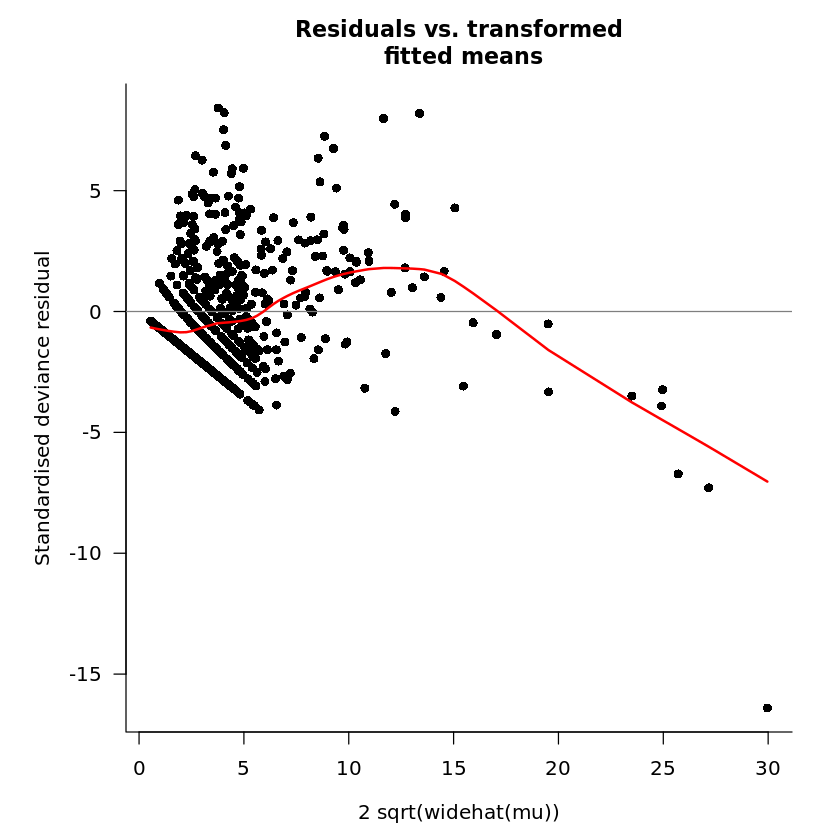

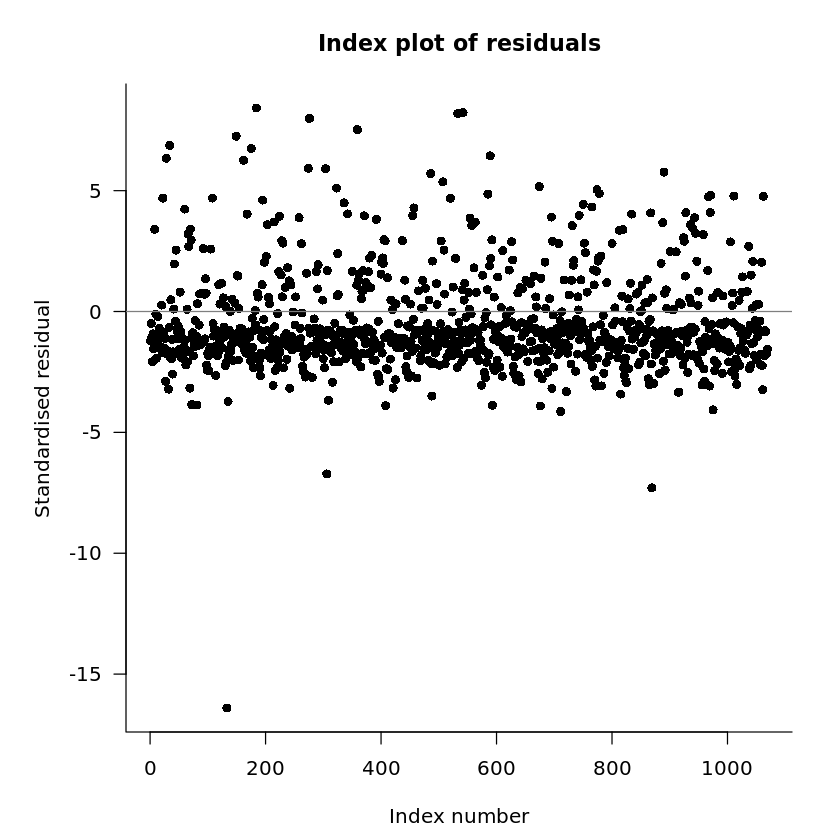

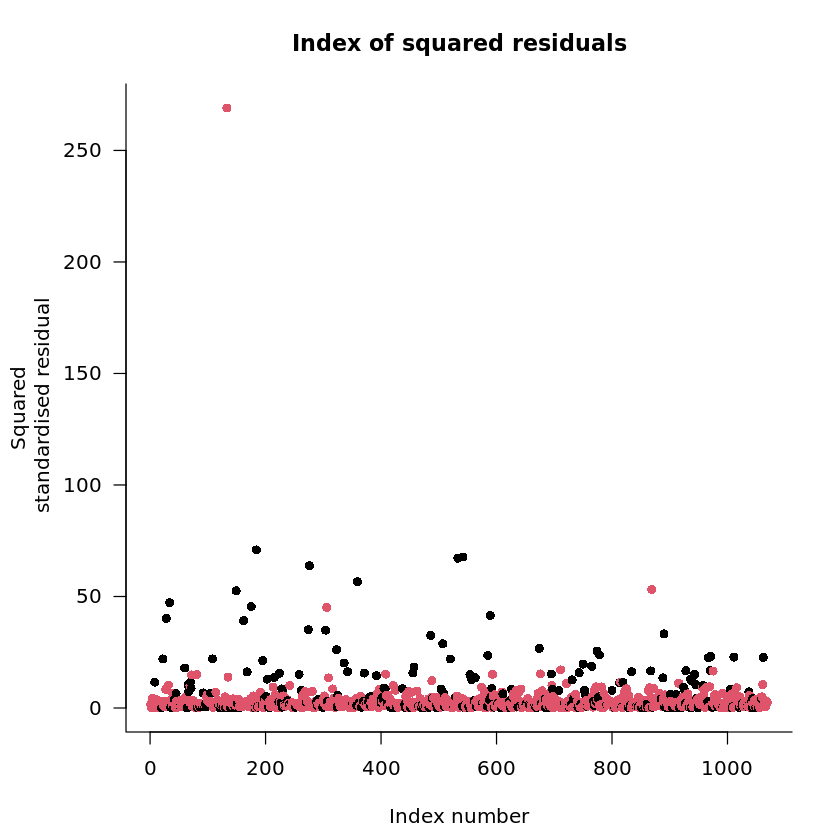

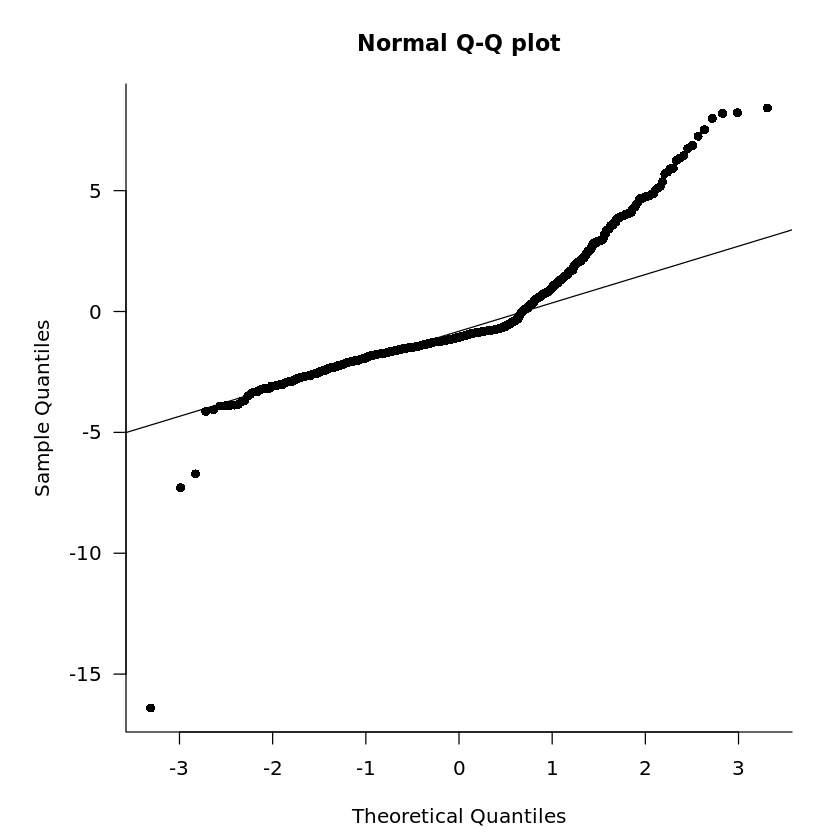

In [3]:
glmResidPlot(modelFit)

### (ii)

Considering each diagnostic plot you produced in part (i) in turn, do there seem to be any problems with the fitted model?

#### Solution <a class="tocSkip">

The **Residuals vs. transformed fitted values plot** shows most standardised deviance residuals clustered towards the left-hand side of the plot. Generally, there seem to be more large positive valued residuals than large negative valued ones, with most of the negative valued residuals closer to zero. However, for large values of the transformed fitted response, all residuals are negative, with a decreasing trend as the transformed fitted response increases. This is relfected in the cruved nature of the red line. The residual furthest away from zero is negative ($< -15$) and corresponds to the largest value of the transformed fitted response. This value stands out as all other residuals are between $-10$ and $10$. Note that, because the response is discrete, there is the appearance of 'lines' in the plot

The **Index plot of residuals** shows more clearly that the majority of residuals are negative, which confirms the conclusion made in Notebook activity RU.02, when looking at the quartiles of residuals. The third quartile is negative, implying that at least three quarters of residuals are negative. Further, the plot confirms that the positive residuals are more spread out, and also shows the one particularly large negative residual. However, there is no specific pattern from left to right in this plot, so the independence assumption seems reasonable.

The **Index of squared residuals plot** confirms our conclusions from the **Index plot of residuals**. There are more negative residuals than positive ones, but their values are less variable. This may indicate that the variance of the response variable is not consistent with the model.

The **Normal Q-Q plot** exhibits a V-shape, with the upper end of the V veering away from the straight line. The large negative residual again stands out. The assumption of normality of the standardised deviance residuals is clearly not satisfied.

Overall, except for the independence assumption, the model assumptions seem in doubt.

### (iii)

In part (c)(ii), we saw that for large values of the transformed fitted response the values of the standardised deviance residuals are negative and decreasing. 

How would you interpret this phenomenon?

#### Solution <a class="tocSkip">

The transformation of the fitted response is the square root, so large values of the fitted response correspond to large values of its transformation. For these values, the residuals are negative, which implies that the model may systematically overestimate the number of medals. In other words, when the model fits a value corresponding to a comparatively large number of medals, the country is likely to achieve fewer medals than the fitted value. The higher the fitted response value, the more noticeable the overestimation.

## (d) Identifying observations with unusual deviance residuals

In part (c)(ii), we noticed one particularly large standardised deviance residual. When there are unusually large residuals, it is useful to be able to find out which observation it corresponds to. We will do this now.

### (i)

The code cell below gives the code required to find out which observation produced the unusually large (negative) deviance residual. Run the code in the cell. Which observation is the unusual residual associated with?

In [ ]:
# extract the deviance residuals from the fitted model modelFit 
# and store them in the object `resid`
resid <- residuals(modelFit, type = "deviance")

# extract the values of the leverages, which are required for standardising
# the residuals, and store these values in the object `hatvals`
hatvals <- influence(modelFit)$hat

# perform the standardisation 
standardiseResid <- resid/sqrt(1 - hatvals)

# add the standardised deviance residuals to the `olympic` data frame
olympic$standardiseResid <- standardiseResid

# extract the row from the `olympic` data frame for which the value 
# of `standardiseResid` is the lowest (we need the minimum standardised deviance 
# residual, because we know that the deviance residual is negative)
olympic[olympic$standardiseResid == min(olympic$standardiseResid), ]

#### Solution <a class="tocSkip">

The outlier is the medal count for the United States in 1996. At the previous Olympics they had achieved 108 medals, and they were hosting in 1996. The model predicted far more medals than the 101 that were achieved.